## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Data Preparation

#### data load

In [2]:
data = pd.read_csv('titanic.csv')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### data check

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### data drop/fill

In [8]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [14]:
data.dropna(axis=0, how='any', inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


#### data conversion

In [17]:
data['Age'] = data['Age'].astype('int64')
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [18]:
# Convert Sex Datatype using Label Encoding
# converting type of columns 'Sex' to 'category'
data['Sex'] = data['Sex'].astype('category')
# Assigning numerical values and storing in another column
data['Sex_Cat'] = data['Sex'].cat.codes
data.dtypes

Survived       int64
Pclass         int64
Sex         category
Age            int64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
Sex_Cat         int8
dtype: object

In [19]:
data['Sex_Cat'] = data['Sex_Cat'].astype('int64')
data.dtypes

Survived       int64
Pclass         int64
Sex         category
Age            int64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
Sex_Cat        int64
dtype: object

In [22]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Cat
0,0,3,male,22,1,0,7.2500,S,1
1,1,1,female,38,1,0,71.2833,C,0
2,1,3,female,26,0,0,7.9250,S,0
3,1,1,female,35,1,0,53.1000,S,0
4,0,3,male,35,0,0,8.0500,S,1


#### Data Grouping

In [34]:
data.groupby('Pclass').sum()

,Survived,Age,SibSp,Parch,Fare,Sex_Cat
Pclass,,,,,,
1,134,7880,90,77,18017.4125,122
2,87,5484,74,70,3801.8417,108
3,119,12860,302,193,6714.6951,347


## 3. Data Visualization

#### Single Variable

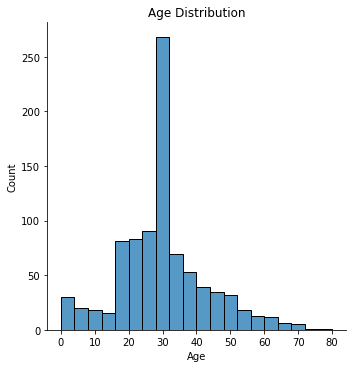

In [28]:
sns.displot(data['Age'], bins = 20)
plt.title("Age Distribution")
plt.show()

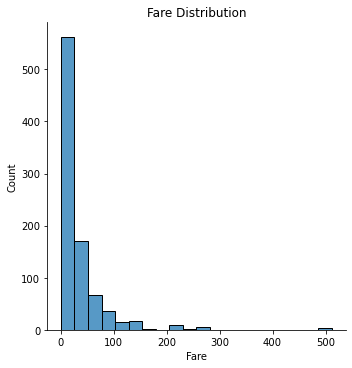

In [29]:
sns.displot(data['Fare'], bins = 20)
plt.title("Fare Distribution")
plt.show()

#### Two Variable

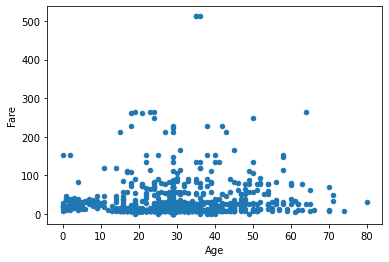

In [46]:
data.plot(kind = 'scatter', x = 'Age', y = 'Fare')
plt.show()

#### Multivariable

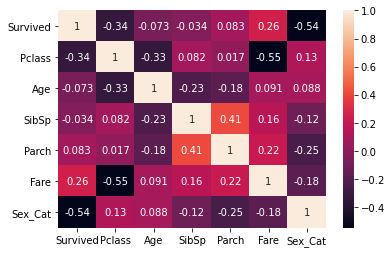

In [40]:
sns.heatmap(data=data.corr(), annot=True)
plt.show()

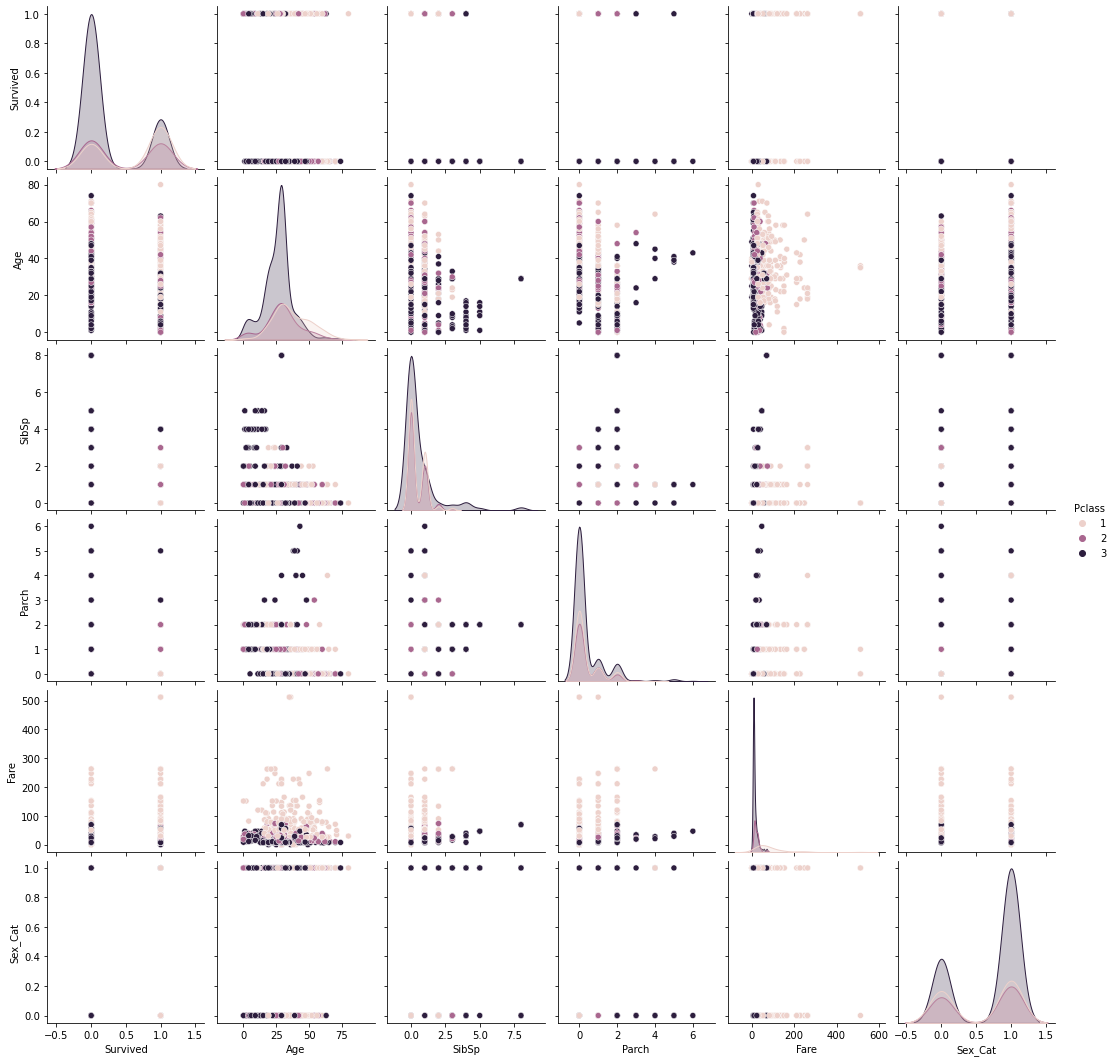

In [43]:
# hue untuk menspesifikkan kategori yang diberi indikator warna
sns.pairplot(data = data, hue = 'Pclass')
plt.show()